In [1]:
try:
    # mount google drive
    from google.colab import drive  # nopep8
    drive_path = "/content/drive"
    drive.mount(drive_path)
    drive_folder = drive_path + "/MyDrive/dtm/"
    using_colab = True
except ModuleNotFoundError:
    # Assume we are not on google colab,
    drive_folder = "data/"
    using_colab = False
    pass

Mounted at /content/drive


In [2]:
import pickle
import os, re, sys
import pandas as pd
import matplotlib.pyplot as plt

/content/drive/MyDrive/dtm/scan_objects/talos_tenerife_batch_size.pickle
talos_tenerife_batch_size/8 13.269612312316895
batch_size_0_boxplot.pdf


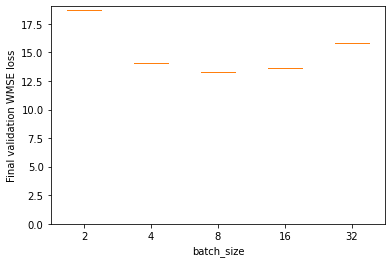

/content/drive/MyDrive/dtm/scan_objects/talos_tenerife_displace.pickle
talos_tenerife_batch_size/8 13.269612312316895
displace_1_boxplot.pdf


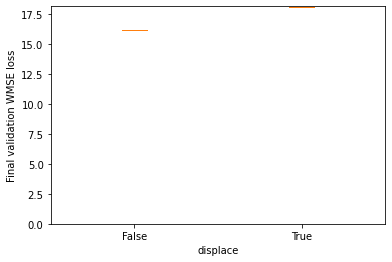

/content/drive/MyDrive/dtm/scan_objects/talos_tenerife_firstLayerSize.pickle
talos_tenerife_batch_size/8 13.269612312316895
firstLayerSize_2_boxplot.pdf


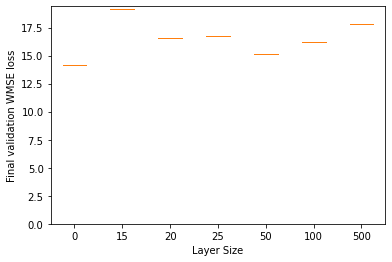

/content/drive/MyDrive/dtm/scan_objects/talos_tenerife_input.pickle
talos_tenerife_input/sobel 12.778478622436523
input_3_boxplot.pdf


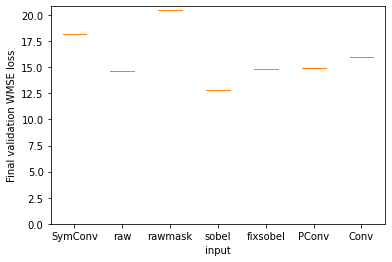

/content/drive/MyDrive/dtm/scan_objects/talos_tenerife_loss.pickle
talos_tenerife_input/sobel 12.778478622436523
loss_4_boxplot.pdf


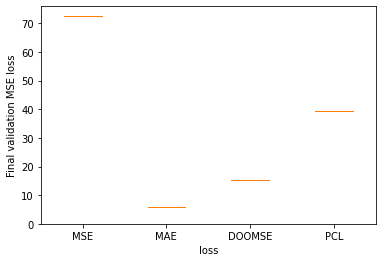

/content/drive/MyDrive/dtm/scan_objects/talos_tenerife_mobileNet_alpha.pickle
talos_tenerife_input/sobel 12.778478622436523
mobileNet_alpha_5_boxplot.pdf


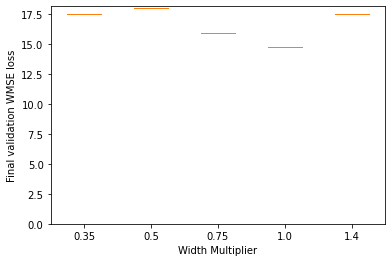

/content/drive/MyDrive/dtm/scan_objects/talos_tenerife_mobileNet_weights.pickle
talos_tenerife_input/sobel 12.778478622436523
mobileNet_weights_7_boxplot.pdf


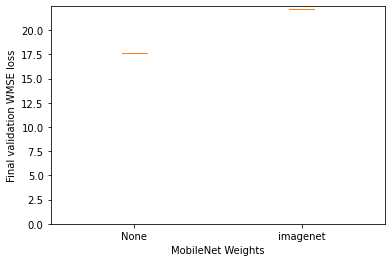

/content/drive/MyDrive/dtm/scan_objects/talos_tenerife_optimizer__learning_rate.pickle
talos_tenerife_input/sobel 12.778478622436523
optimizer_8_boxplot.pdf


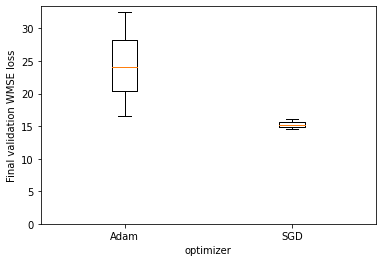

learning_rate_8_boxplot.pdf


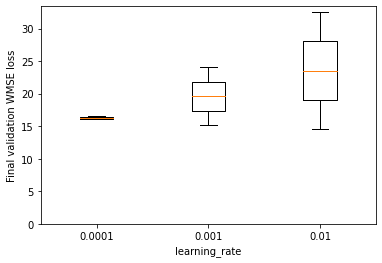

/content/drive/MyDrive/dtm/scan_objects/talos_tenerife_sharedWeights__repeat.pickle
talos_tenerife_sharedWeights__repeat/False__3 10.892043113708496
sharedWeights_9_boxplot.pdf


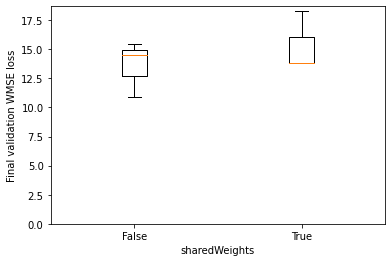

/content/drive/MyDrive/dtm/scan_objects/talos_tenerife_mobileNet_pooling__repeat.pickle
talos_tenerife_sharedWeights__repeat/False__3 10.892043113708496
mobileNet_pooling_10_boxplot.pdf


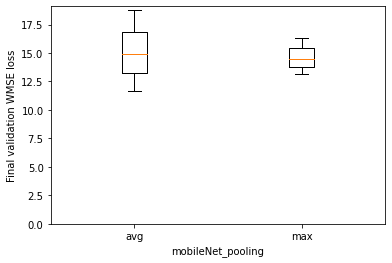

/content/drive/MyDrive/dtm/scan_objects/talos_tenerife_dropout.pickle
talos_tenerife_sharedWeights__repeat/False__3 10.892043113708496
dropout_11_boxplot.pdf


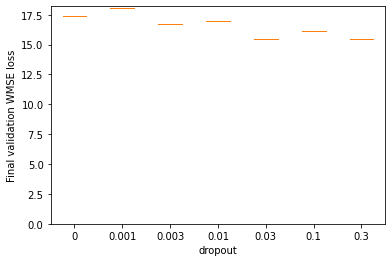

/content/drive/MyDrive/dtm/scan_objects/talos_tenerife_input_old.pickle
talos_tenerife_sharedWeights__repeat/False__3 10.892043113708496
input_12_boxplot.pdf


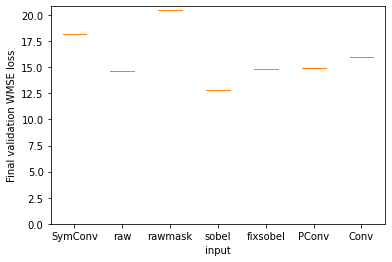

/content/drive/MyDrive/dtm/scan_objects/talos_tenerife_activation__repeat.pickle
talos_tenerife_sharedWeights__repeat/False__3 10.892043113708496
activation_13_boxplot.pdf


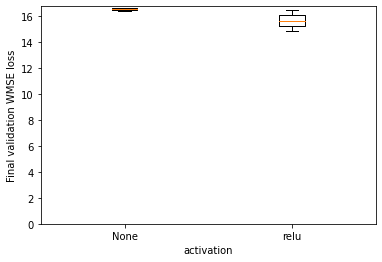

In [3]:
import numpy as np
folder=os.path.join(drive_folder,"scan_objects")
files=[file for file in os.listdir(folder) if re.match(".*\.pickle",file)]
files = [os.path.join(folder, f) for f in files] # add path to each file
files.sort(key=lambda x: os.path.getmtime(x))

min_val=100
min_path=""
for num_file,file in enumerate(files):
  # if not ("activation" in file):
  #   continue
  if "talos_tenerife_mobileNet_alpha__secondLayerSize" in file:
    continue
  if "oxia" in file:
    continue
  path=os.path.join(folder, file)
  with (open(path, "rb")) as openfile:
    t=pickle.load(openfile)
  print(path)
  keys= [k for k,v in t["params"].items() if len(v)>1]
  legend=[]
  df=pd.DataFrame(t["data"])
  assert(df.columns[4]=="loss")
  columns=list(df.columns)
  columns[4]="train_loss"
  df.columns=columns
  loss_name=t['params']['loss'][0]
  if "DOOM" in loss_name:
    loss_name="WMSE"

  for i in range(len(t["data"])):
    if t["data"]["loss"][i] != "DOOMSE":
      continue
    min_val_i=min(t["round_history"][i]["val_loss"])
    if min_val_i<min_val:
      values=[str(t["data"][k][i]) for k in keys]
      name="__".join(values)
      name=name.replace(".","_")
      min_path=file[40:-7]+"/"+name
      min_val=min_val_i
  print(min_path, min_val)


  for key in keys:
    if "repeat" in key:
      continue
    values=[v for v in t["params"][key] if v!=5] 
    v_min=[(t["data"][key][i],min(rh["val_loss"])) for i,rh in enumerate(t["round_history"])] #if t["data"]["optimizer"][i]=="SGD"]
    data=[[min for v,min in v_min if v==value] for value in values]
    try:
      plt.boxplot(data,labels=[(0 if v==10 else str(v))  for v in values], positions=np.argsort([float(v) for v in values]))
    except:
      plt.boxplot(data,labels=[str(v) for v in values])
    plt.ylabel(f"Final validation {loss_name} loss")
    plt.xlabel(key)
    if "alpha" in key:
      plt.xlabel("Width Multiplier")
    if "weights" in key:
      plt.xlabel("MobileNet Weights")
    if "Size" in key:
      plt.xlabel("Layer Size")
    plt.ylim(0,plt.ylim()[1])
    plt.savefig(f"{key}_{num_file}_boxplot.pdf")
    print(f"{key}_{num_file}_boxplot.pdf")
    plt.show()

[500, 100, 15, 0]


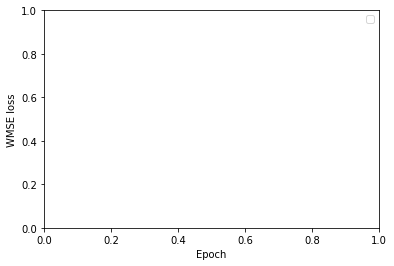

In [4]:


import pickle
experiment_path=os.path.join(drive_folder,"talos_oxia_mobileNet_alpha__secondLayerSize")
i="1_0__100"
pickle_path=[file for file in os.listdir(experiment_path) if re.match(".*\.pickle",file)]
pickle_path=os.path.join(experiment_path, pickle_path[0])

with (open(pickle_path, "rb")) as openfile:
  t=pickle.load(openfile)

# for history in t["round_history"]:
#   plt.plot(history["val_loss"])

keys= [k for k,v in t["params"].items() if len(v)>1]
plotted_keys=[]
non_plotted_keys=[k for k in keys if k not in plotted_keys]
legend=[]



loss_name=t['params']['loss'][0]
if "DOOM" in loss_name:
  loss_name="WMSE"
plt.ylabel(f"{loss_name} loss")
plt.xlabel("Epoch")
for i,history in enumerate(t["round_history"]):
  if not all(t["data"][key][i]==values[0] for key in non_plotted_keys):
    continue
  if len(plotted_keys)>0:
    legend.append(" ".join([str(t["data"][pk][i]) for pk in plotted_keys]))
  else:
    legend=[f"Training",f"Validation"]
    plt.plot(history["loss"])
  plt.plot(history["val_loss"])

print(t["params"][keys[1]])

plt.xlim(0, plt.xlim()[1])
plt.ylim(0, plt.ylim()[1])
plt.legend(legend,title=" ".join(plotted_keys));
plt.savefig("loss_success1.pdf")
plt.show()

['sharedWeights', 'repeat']


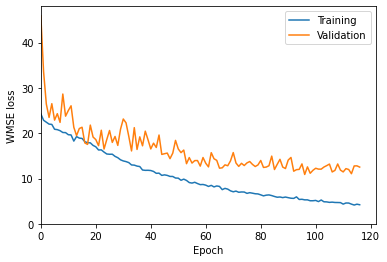

In [5]:
pickle_path=os.path.join(drive_folder,"scan_objects","talos_tenerife_sharedWeights__repeat.pickle")

with (open(pickle_path, "rb")) as openfile:
  t=pickle.load(openfile)


keys= [k for k,v in t["params"].items() if len(v)>1]
# plotted_keys=[keys[1]]
plotted_keys=[]
# plotted_keys=keys
non_plotted_keys=[k for k in keys if k not in plotted_keys]
legend=[]


print(keys)

loss_name=t['params']['loss'][0]
if "DOOM" in loss_name:
  loss_name="WMSE"
plt.ylabel(f"{loss_name} loss")
plt.xlabel("Epoch")
for i,history in enumerate(t["round_history"]):
  if t["data"]["sharedWeights"][i]:
    continue
  if t["data"]["repeat"][i]!=3:
    continue
  if len(plotted_keys)>0:
    legend.append(" ".join([str(t["data"][pk][i]) for pk in plotted_keys]))
    legend.append(" ".join([str(t["data"][pk][i]) for pk in plotted_keys]))
    plt.ylabel(f"Validation {loss_name} loss")
  else:
    legend=[f"Training",f"Validation"]
  plt.plot(history["loss"])
  plt.plot(history["val_loss"])


plt.xlim(0, plt.xlim()[1])
plt.ylim(0, plt.ylim()[1])
plt.legend(legend,title=" ".join(plotted_keys));
plt.savefig("False_3_loss.pdf")
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A va

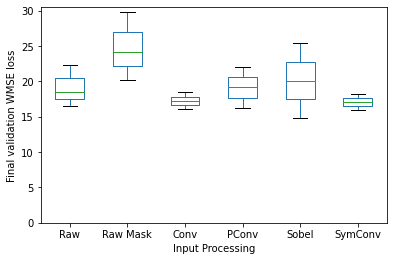

In [6]:
file=os.path.join(drive_folder,"input.csv")
df=pd.read_csv(file)
df = df[["Sym" not in inp for inp in df["input"]]] 
df["input"][df["input"]=="sobel"]="SymConv"
df["input"][df["input"]=="fixsobel"]="Sobel"
df["input"][df["input"]=="PConv"]="PConv"
df["input"][df["input"]=="raw"]="Raw"
df["input"][df["input"]=="rawmask"]="Raw Mask"
df.boxplot("val_loss",by="input",positions=[3,4,1,2,5,6]);
plt.ylim(0,plt.ylim()[1])
plt.suptitle("")
plt.title("")
plt.grid(False)
plt.xlabel("Input Processing")
plt.ylabel(f"Final validation WMSE loss")
plt.savefig("input_processing_boxplot.pdf")